In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:

df = pd.read_csv(r"C:\Users\arsh\Downloads\amazon_alexa.tsv", delimiter = '\t', quoting = 3)
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [20]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [21]:
df.columns.values

array(['rating', 'date', 'variation', 'verified_reviews', 'feedback'],
      dtype=object)

In [22]:

#chech null 

df.isnull().sum()




rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [23]:


df[df['verified_reviews'].isnull() == True]





,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [24]:

df.dropna( inplace = True)




In [25]:
df.shape

(3149, 5)

In [26]:
df[df['verified_reviews'].isnull() == True]

,rating,date,variation,verified_reviews,feedback


In [27]:
# creaate nwe columns
df['length'] = df['verified_reviews'].apply(len)

In [28]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [29]:

print(f"'verified_reviews' column value: {df.iloc[10]['verified_reviews']}")


print(f"Length of review : {len(df.iloc[10]['verified_reviews'])}")

print(f"'length' column value : {df.iloc[10]['length']}")

'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length' column value : 65


In [30]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [31]:
len(df)


3149

In [32]:
#df['rating'].value_counts()


print (f" Rating value counts : \n { df['rating'].value_counts()}")


 Rating value counts : 
 rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


<Axes: xlabel='rating'>

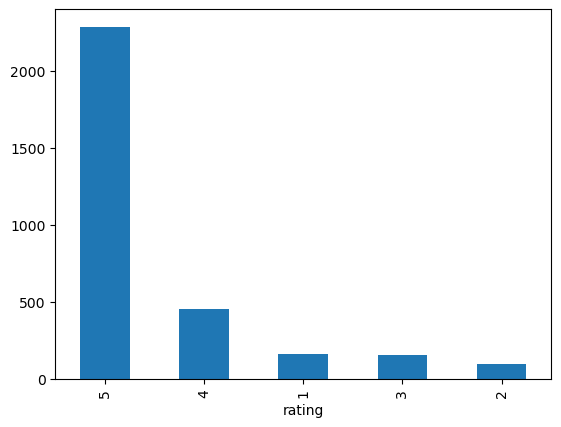

In [33]:
df['rating'].value_counts().plot.bar()


In [34]:
#percentage of ratings

df['rating'].value_counts()/df.shape[0]*100

rating
5    72.594474
4    14.449031
1     5.112734
3     4.826929
2     3.016831
Name: count, dtype: float64

In [35]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [36]:
# df[['verified_reviews','feedback']].corr()

df[['length','feedback','rating']].corr()

,length,feedback,rating
length,1.000000,-0.137037,-0.193676
feedback,-0.137037,1.000000,0.861780
rating,-0.193676,0.861780,1.000000


<Axes: xlabel='rating', ylabel='feedback'>

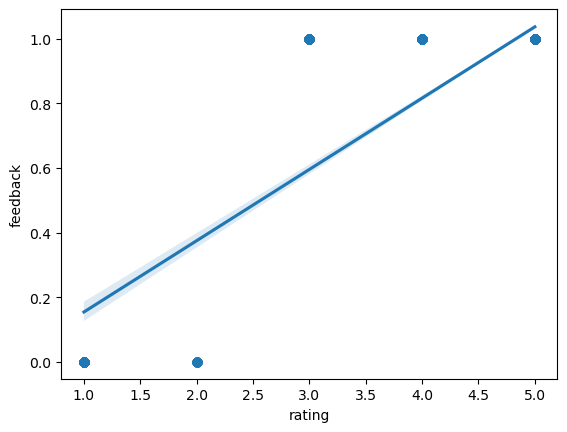

In [37]:
sns.regplot(x= df['rating'], y = df['feedback'])

In [38]:
rev_0 = df[df['feedback']== 0].iloc[1]['verified_reviews']
rev_0

'Sound is terrible if u want good music too get a bose'

In [39]:
rev_1 = df[df['feedback']== 1].iloc[1]['verified_reviews']
rev_1

'Loved it!'

In [40]:
# thats mean 1 is for good and 0 is fo r bad in feedback

In [41]:
df['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

<Axes: xlabel='feedback'>

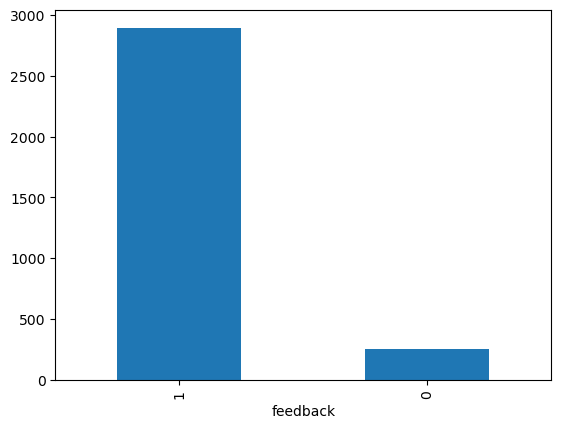

In [42]:
df['feedback'].value_counts().plot.bar()

In [43]:
df['feedback'].value_counts()/df.shape[0]* 100

feedback
1    91.870435
0     8.129565
Name: count, dtype: float64

In [44]:
df[df['feedback'] ==0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [45]:
df[df['feedback'] ==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [46]:
# 1,2 negative 
#and 3,4,5 positive

In [47]:
df['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

In [48]:
df['variation'].value_counts()/df.shape[0]*100

variation
Black  Dot                      16.386154
Charcoal Fabric                 13.655129
Configuration: Fire TV Stick    11.114640
Black  Plus                      8.574151
Black  Show                      8.415370
Black                            8.288346
Black  Spot                      7.653223
White  Dot                       5.843125
Heather Gray Fabric              4.985710
White  Spot                      3.461416
Sandstone Fabric                 2.858050
White                            2.858050
White  Show                      2.699270
White  Plus                      2.476977
Oak Finish                       0.444586
Walnut Finish                    0.285805
Name: count, dtype: float64

In [49]:
df.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

<Axes: xlabel='variation'>

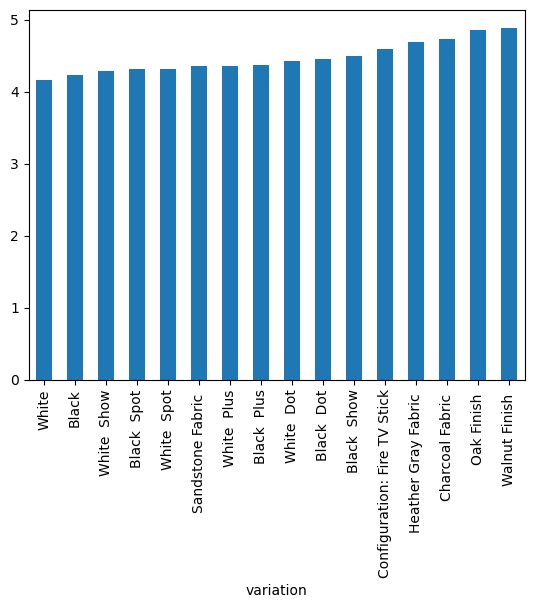

In [50]:
df.groupby('variation')['rating'].mean().sort_values().plot.bar()

In [51]:

df['length'].describe()



count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'destridution of  length')]

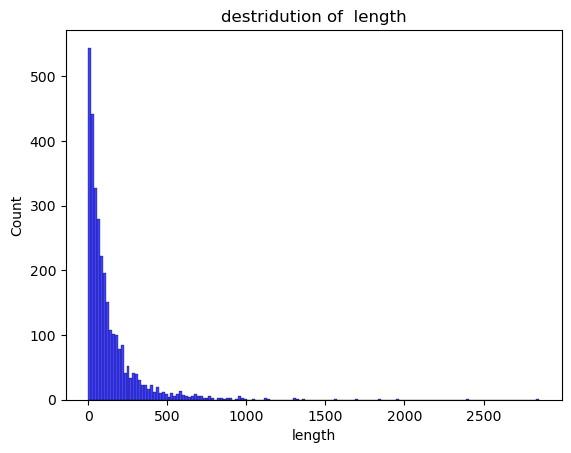

In [52]:
sns.histplot(df['length']  ,color = 'blue' ).set(title = 'destridution of  length')


In [53]:

# lets check when feedback in 0 and 1


[Text(0.5, 1.0, 'length when feedbock in 1')]

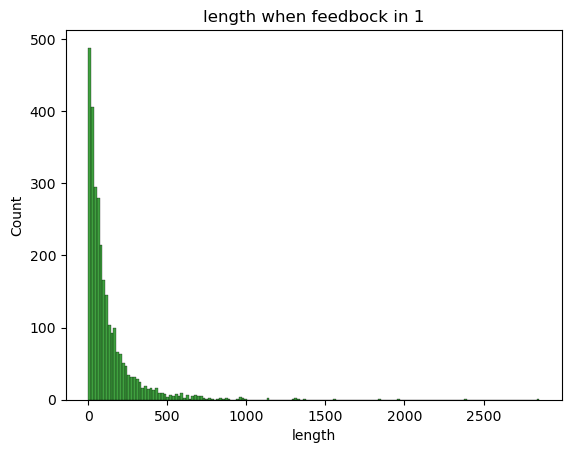

In [54]:
sns.histplot(df[df['feedback'] ==1] ['length'],color='green' ).set(title = "length when feedbock in 1")

[Text(0.5, 1.0, 'length when feedbock in 0')]

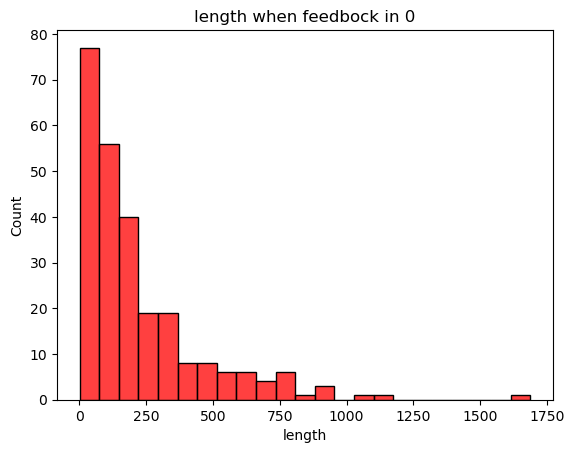

In [55]:
sns.histplot(df[df['feedback'] ==0] ['length'],color='red' ).set(title = "length when feedbock in 0")

<Axes: ylabel='Frequency'>

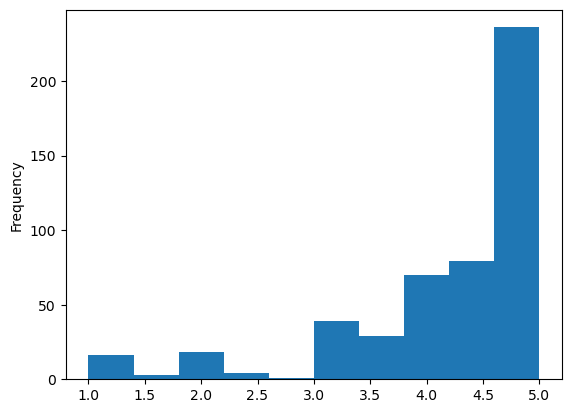

In [56]:
df.groupby('length')['rating'].mean().plot.hist()

In [57]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df.verified_reviews)

In [58]:
# from wordcloud import WordCloud
#combine all reviews
reviews = " ".join([review for review in df['verified_reviews']])

#initilize wordcloud object
wc = WordCloud(background_color = 'white', max_words=50)



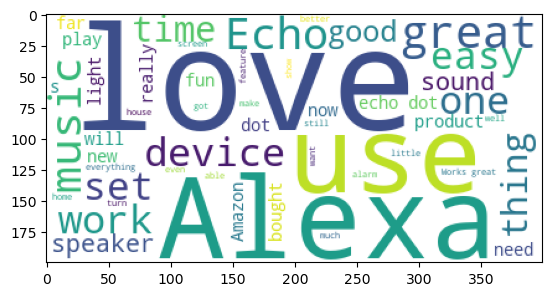

In [59]:
#generate and plot wordcloud
plt.imshow(wc.generate(reviews))

In [60]:
# combine negative reviews
neg_reviews = " ".join([review for review in df[df["feedback"]==0]['verified_reviews'] ])
neg_reviews = neg_reviews.lower().split()

#combine positive reviews

pos_reviews = " ".join([review for review in df[df["feedback"]==1]['verified_reviews'] ])
pos_reviews = pos_reviews.lower().split()

In [61]:

# finging word which present in only in one cetogery
unique_negative = [ x for x in neg_reviews if x not in pos_reviews ]
unique_negative =  " ".join(unique_negative)

unique_positive = [ x for x in pos_reviews if x not in neg_reviews ]
unique_positive =  " ".join(unique_positive)

<Figure size 1000x1000 with 0 Axes>

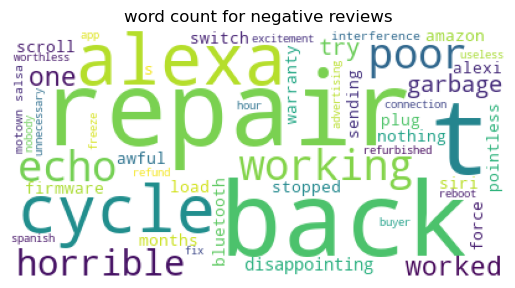

<Figure size 1000x1000 with 0 Axes>

In [62]:



plt.imshow(wc.generate(unique_negative))
plt.title("word count for negative reviews")
plt.axis('off')
plt.figure(figsize = (10,10))



<Figure size 1000x1000 with 0 Axes>

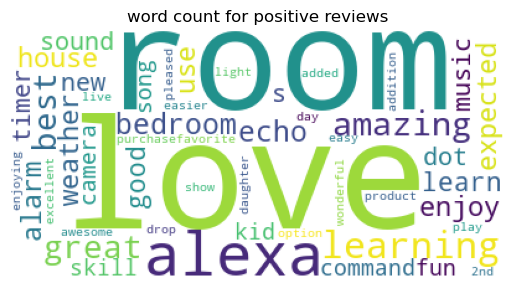

<Figure size 1000x1000 with 0 Axes>

In [63]:

plt.imshow(wc.generate(unique_positive))

plt.title("word count for positive reviews")
plt.axis('off')
plt.figure(figsize = (10,10))

In [64]:







#########################         Modeling         #################################







In [65]:
corpus = []
stemmer =  PorterStemmer()

for i in range ( 0 , df.shape[0]):
    review = re.sub('[^a-zA-Z]' ," " , df.iloc[i]['verified_reviews']  )
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    #print (review)
    corpus.append(review)
    


In [66]:
#print(review)
#print (corpus)

In [67]:
cv = CountVectorizer(max_features = 2500)
#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = df['feedback'].values

In [68]:
#saving countvectorization

pickle.dump(cv, open('C:/Users/arsh/Downloads/models/countVectorizer.pkl', 'wb'))

In [69]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


In [70]:
# divide data in to 70% and 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [71]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


In [72]:
# scale X_train and X_test  so that all values are bw 0 and 1
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [73]:
pickle.dump(scaler , open('C:/Users/arsh/Downloads/models/scaler.pkl', 'wb'))

In [74]:
#random forest

model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [75]:
# check accurety of model

print("Traninig accureacy :",model_rf.score(X_train_scl , y_train))
print("Testing accureacy  :",model_rf.score(X_test_scl , y_test))
    

Traninig accureacy : 0.9945553539019963
Testing accureacy  : 0.9470899470899471


In [76]:
#prediction on the test set 
y_preds = model_rf.predict(X_test_scl)


In [77]:
#confusion matrix
cm = confusion_matrix(y_test , y_preds)

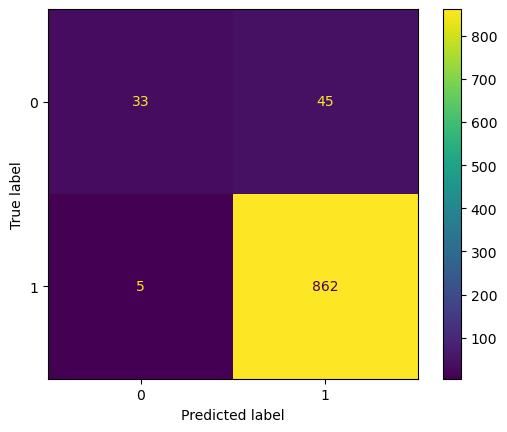

In [78]:
cm_display = ConfusionMatrixDisplay( confusion_matrix = cm , display_labels=model_rf.classes_ )
cm_display.plot()
plt.show()

In [79]:
# K fold

acc = cross_val_score(estimator=model_rf, X = X_train_scl, y=y_train , cv=10)

print(acc.mean())
print(acc.std())


0.9337597696421225
0.009106768656944628


In [80]:
#Xg boost
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [81]:
print(model_xgb.score(X_train_scl , y_train))
print(model_xgb.score(X_test_scl , y_test))

0.971415607985481
0.9417989417989417


In [82]:
y_preds= model_xgb.predict(X_test)

In [83]:
#confusion materix
cm = confusion_matrix(y_test, y_preds)


In [208]:
cm

array([[ 31,  47],
       [ 13, 854]], dtype=int64)

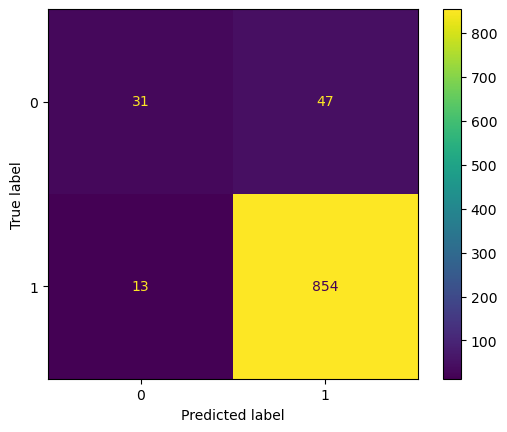

In [85]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [86]:
pickle.dump(model_xgb , open('C:/Users/arsh/Downloads/models/model_xgb.pkl', 'wb'))

In [87]:

# decision tree

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl , y_train)


DecisionTreeClassifier()

In [194]:
print( model_dt.score(X_train_scl, y_train))
print( model_dt.score(X_test_scl, y_test))

0.9945553539019963
0.9227513227513228


In [7]:


predictor = pickle.load(open(r"C:/Users/arsh/Downloads/models/model_xgb.pkl", "rb"))
scaler = pickle.load(open(r"C:/Users/arsh/Downloads/models/scaler.pkl", "rb"))
cv = pickle.load(open(r"C:/Users/arsh/Downloads/models/countVectorizer.pkl", "rb"))


def single_prediction(predictor, scaler, cv, text_input):
    corpus = []
    stemmer = PorterStemmer()
    review = re.sub("[^a-zA-Z]", " ", text_input)
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = " ".join(review)
    corpus.append(review)
    X_prediction = cv.transform(corpus).toarray()
    X_prediction_scl = scaler.transform(X_prediction)
    y_predictions = predictor.predict_proba(X_prediction_scl)
    y_predictions = y_predictions.argmax(axis=1)[0]
    return "Positive" if y_predictions == 1 else "Negative"







In [21]:
            # Single string prediction
        #text_input = " horrible. boss quit shortly becomes unresponsive upsetting. crackling item? siri, accurately deals." "stopped ,didn\'t commands!? working? worthless. plug-in assumption sell rechargeable battery. boom flexibility lapsed"


text_input = "does not work all the time"
single_prediction(predictor, scaler, cv, text_input)



'Negative'

In [25]:




text_input = "the sound is superb"
single_prediction(predictor, scaler, cv, text_input)

'Positive'